### This script reads lhe file from MadGraph, which contains 10000 events of p p > j j at 14TeV.

In [33]:
import pylhe
import numpy as np

events = pylhe.read_lhe_with_attributes("events/unweighted_events.lhe")
counter = 0
particle_list = []

for event in events:
    for particle in event.particles:
        if abs(particle.id) <= 6 or particle.id == 21:  # quarks and gluons
            counter += 1
            # save the information of the particle
            particle_list.append([particle.e, particle.px, particle.py, particle.pz])
            #print(f"ID: {particle.id}, E: {particle.e}, px: {particle.px}, py: {particle.py}, pz: {particle.pz}")
    #print("--------------------------------------------------")
# make mjj cut on events 2000GeV < mjj < 2250GeV
particle_list = np.array(particle_list)
particle_list_cut = []
for i in range(int(1e4)):
    mjj = np.sqrt((particle_list[4*i+2][0] + particle_list[4*i+3][0])**2 - (particle_list[4*i+2][1] + particle_list[4*i+3][1])**2 - (particle_list[4*i+2][2] + particle_list[4*i+3][2])**2 - (particle_list[4*i+2][3] + particle_list[4*i+3][3])**2)
    if mjj > 2000 and mjj < 2250:
        particle_list_cut.append([particle_list[4*i][0], particle_list[4*i][1], particle_list[4*i][2], particle_list[4*i][3]])
        particle_list_cut.append([particle_list[4*i+1][0], particle_list[4*i+1][1], particle_list[4*i+1][2], particle_list[4*i+1][3]])
        particle_list_cut.append([particle_list[4*i+2][0], particle_list[4*i+2][1], particle_list[4*i+2][2], particle_list[4*i+2][3]])
        particle_list_cut.append([particle_list[4*i+3][0], particle_list[4*i+3][1], particle_list[4*i+3][2], particle_list[4*i+3][3]])
        #print(f"E: {particle_list[i][0]}, px: {particle_list[i][1]}, py: {particle_list[i][2]}, pz: {particle_list[i][3]}")

print(f"Total parton number after mjj cut: {len(particle_list_cut)}")
print(f"Total parton number: {counter}")

Total parton number after mjj cut: 0
Total parton number: 40000


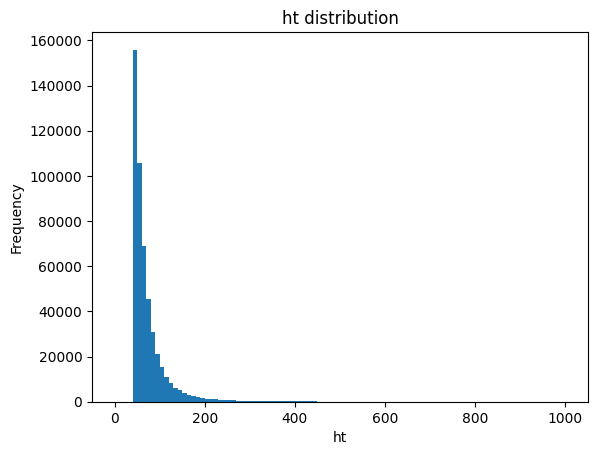

In [29]:
#ht distribution
ht = []
for i in range(int(len(particle_list_cut)/4)):
    ht.append(np.sqrt(particle_list[4*i+2][1]**2 + particle_list[4*i+2][2]**2)+ np.sqrt(particle_list[4*i+3][1]**2 + particle_list[4*i+3][2]**2))
ht = np.array(ht)
plt.hist(ht, bins=100, range=(0, 1000))
plt.xlabel("ht")
plt.ylabel("Frequency")
plt.title("ht distribution")
plt.show()

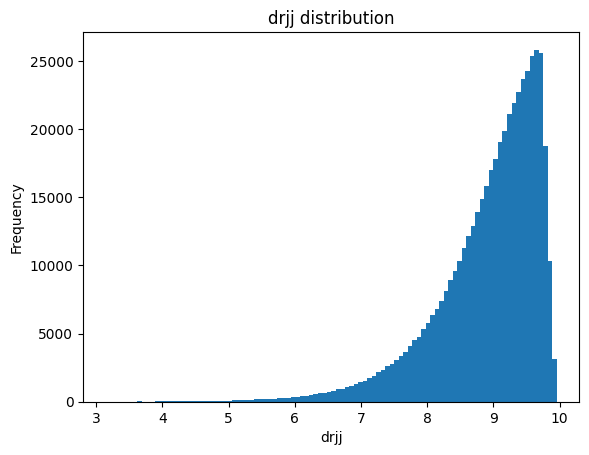

In [28]:
# drjj distribution
import matplotlib.pyplot as plt
def eta_phi(k):
    return np.arctanh(k[3]/k[0]), np.arctan2(k[2], k[1])
drjj_list = []
for i in range(int(len(particle_list)/4)):
    drjj = np.sqrt((eta_phi(particle_list[4*i+2])[0] - eta_phi(particle_list[4*i+3])[0])**2 + (eta_phi(particle_list[4*i+2])[1] - eta_phi(particle_list[4*i+3])[1])**2)
    drjj_list.append(drjj)
drjj_list = np.array(drjj_list)
plt.hist(drjj_list, bins=100)
plt.xlabel("drjj")
plt.ylabel("Frequency")
plt.title("drjj distribution")
plt.show()

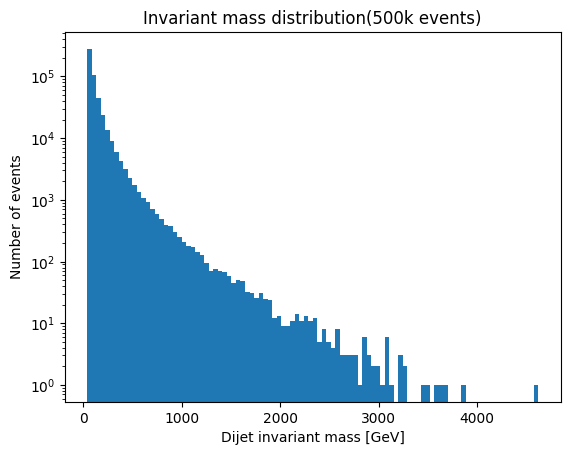

59


In [31]:
# Invariant mass distribution
mjj_list = []
for i in range(int(5e5)):
    mjj = np.sqrt((particle_list[4*i+2][0] + particle_list[4*i+3][0])**2 - (particle_list[4*i+2][1] + particle_list[4*i+3][1])**2 - (particle_list[4*i+2][2] + particle_list[4*i+3][2])**2 - (particle_list[4*i+2][3] + particle_list[4*i+3][3])**2)
    mjj_list.append(mjj)
mjj_list = np.array(mjj_list)
import matplotlib.pyplot as plt
plt.hist(mjj_list, bins=100)
plt.xlabel(r"Dijet invariant mass [GeV]")
plt.ylabel("Number of events")
plt.yscale("log")
plt.title("Invariant mass distribution(500k events)")
plt.show()
print(np.sum(np.histogram(mjj_list, bins=100, range=(2000, 2250))[0]))

eta -2.435187978653952 -4.5838363222650225
phi 0.6330123050635686 -2.5085803485262246


Text(0.5, 1.0, '$l_T^2[k_1 k_2]$')

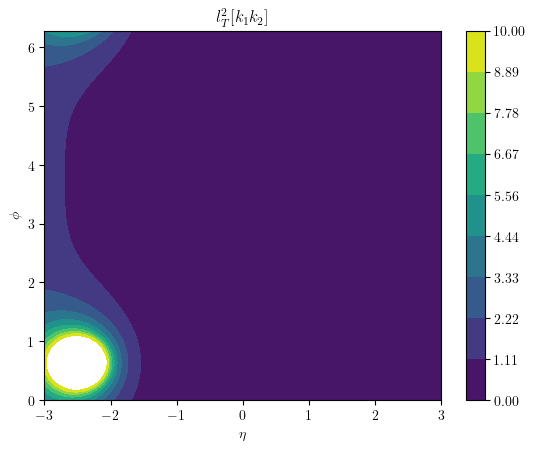

In [2]:
# choose a sample particle

seed = np.random.randint(0, counter/4-1)
# seed = 0
k1 = np.array(particle_list[seed*4+2])
k2 = np.array(particle_list[seed*4+3])
# calculate eta and phi of partons
def eta_phi(k):
    return np.arctanh(k[3]/k[0]), np.arctan2(k[2], k[1])

print('eta', eta_phi(k1)[0], eta_phi(k2)[0])
print('phi', eta_phi(k1)[1], eta_phi(k2)[1])

# parameter list of radiated l
phi_list = np.linspace(0, 2*np.pi, 100)
eta_list = np.linspace(-3, 3, 100)
mesh_phi, mesh_eta = np.meshgrid(phi_list, eta_list)
amp_list = []
# dot product of two 4-vectors
def dot_product(k1, k2):
    return k1[0]*k2[0] - k1[1]*k2[1] - k1[2]*k2[2] - k1[3]*k2[3]

# calculate the radiation amplitude, assuming lT = 1
def radiation_amplitude(k1, k2, l):
    return dot_product(k1, k2)/(dot_product(l, k1)*dot_product(l, k2))

for i in range(len(mesh_phi)):
    l = [np.cosh(mesh_eta[i]), np.cos(mesh_phi[i]), np.sin(mesh_phi[i]), np.sinh(mesh_eta[i])]
    amp_list.append(radiation_amplitude(k1, k2, l))

import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.contourf(mesh_eta, mesh_phi, amp_list, levels=np.linspace(0, 10, 10))
plt.colorbar()
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\phi$")
plt.title(r"$l_T^2[k_1 k_2]$")
#plt.savefig("radiation_amplitude.png")

Event number: 3044


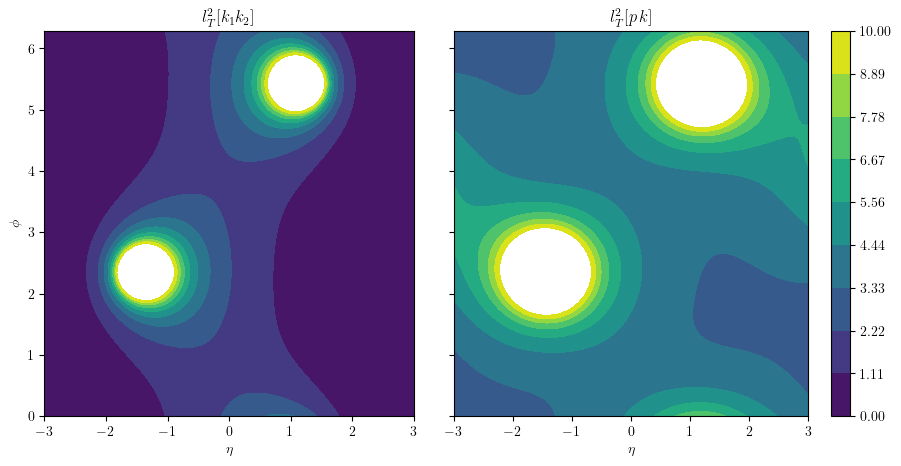

In [121]:
# choose a sample event
#event_no = np.random.randint(0, counter/4-1)
event_no = 3044
print(f"Event number: {event_no}")
p1 = np.array(particle_list[event_no*4])
p2 = np.array(particle_list[event_no*4+1])
k1 = np.array(particle_list[event_no*4+2])
k2 = np.array(particle_list[event_no*4+3])

############################ Boost as in 2306.00079 ############################
def boost(p, beta_x, beta_y):
    gamma_x = 1 / np.sqrt(1 - beta_x**2)
    gamma_y = 1 / np.sqrt(1 - beta_y**2)
    
    p0_x = gamma_x * (p[0] - beta_x * p[1])
    p1_x = gamma_x * (p[1] - beta_x * p[0])
    
    p0_y = gamma_y * (p0_x - beta_y * p[2])
    p2_y = gamma_y * (p[2] - beta_y * p0_x)
    
    return [p0_y, p1_x, p2_y, p[3]]


Boost = True
if Boost:
    betax = 0.01
    betay = 0.01
    p1 = boost(p1, betax, betay)
    p2 = boost(p2, betax, betay)
    k1 = boost(k1, betax, betay)
    k2 = boost(k2, betax, betay)
################################################################################

# calculate eta and phi of partons
def eta_phi(k):
    return np.arctanh(k[3]/k[0]), np.arctan2(k[2], k[1])

# parameter list of radiated l
phi_list = np.linspace(0, 2*np.pi, 100)
eta_list = np.linspace(-3, 3, 100)
mesh_phi, mesh_eta = np.meshgrid(phi_list, eta_list)
amp_list_k1k2 = [] # color connected final states
amp_list_pk = [] # color connected initial and final states
# dot product of two 4-vectors
def dot_product(k1, k2):
    return k1[0]*k2[0] - k1[1]*k2[1] - k1[2]*k2[2] - k1[3]*k2[3]

# calculate the radiation amplitude, assuming lT = 1
def radiation_amplitude(k1, k2, l):
    return dot_product(k1, k2)/(dot_product(l, k1)*dot_product(l, k2))

# for i in range(len(mesh_eta)):
#     amp_row = []
#     for j in range(len(mesh_phi)):
#         l = [np.cosh(mesh_eta[i, j]), np.cos(mesh_phi[i, j]), np.sin(mesh_phi[i, j]), np.sinh(mesh_eta[i, j])]
#         amp_row.append(radiation_amplitude(p1, k1, l))
#     amp_list.append(amp_row)
for i in range(len(mesh_phi)):
    l = [np.cosh(mesh_eta[i]), np.cos(mesh_phi[i]), np.sin(mesh_phi[i]), np.sinh(mesh_eta[i])]
    radiation_amplitude_pk = (radiation_amplitude(p1, k1, l)+radiation_amplitude(p2, k1, l)+radiation_amplitude(p1, k2, l)+radiation_amplitude(p2, k2, l))
    amp_list_pk.append(radiation_amplitude_pk)
    amp_list_k1k2.append(radiation_amplitude(k1, k2, l))

import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
# 3 subplots horizontal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5), gridspec_kw={'width_ratios':(1,1.2),'wspace': 0.1}, sharey=True)

for ax in ax1, ax2:
    ax.set_xlabel(r"$\eta$")
contour1 = ax1.contourf(mesh_eta, mesh_phi, amp_list_k1k2, levels=np.linspace(0, 10, 10))
contour2 = ax2.contourf(mesh_eta, mesh_phi, amp_list_pk, levels=np.linspace(0, 10, 10))
fig.colorbar(contour2, ax=ax2)
ax1.set_ylabel(r"$\phi$")
ax1.set_title(r"$l_T^2[k_1 k_2]$")
ax2.set_title(r"$l_T^2[p\, k]$")
plt.show()
#fig.savefig(rf"radiation_amplitude_{event_no}{'_boosted' if Boost else ''}.png")

Use a predefined parton 4 vector

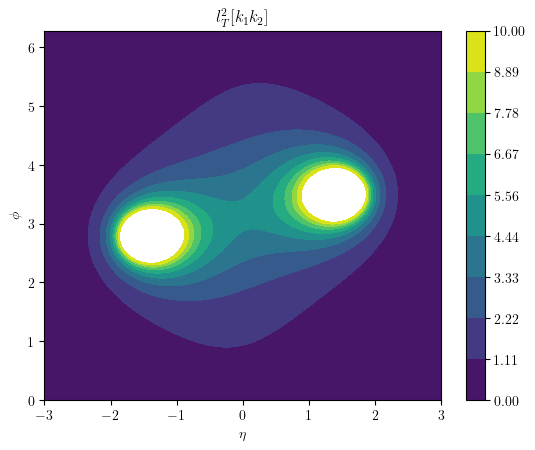

In [143]:
# choose a sample particle

seed = np.random.randint(0, counter/2-1)
# seed = 0
eta = 1.5
phi = 3.5
k1 = [np.cosh(eta), np.cos(phi), np.sin(phi), np.sinh(eta)]
k2 = [np.cosh(-eta), np.cos(2*np.pi-phi), np.sin(2*np.pi-phi), np.sinh(-eta)]
# calculate eta and phi
phi_list = np.linspace(0, 2*np.pi, 100)
eta_list = np.linspace(-3, 3, 100)
mesh_phi, mesh_eta = np.meshgrid(phi_list, eta_list)
amp_list = []
# dot product of two 4-vectors
def dot_product(k1, k2):
    return k1[0]*k2[0] - k1[1]*k2[1] - k1[2]*k2[2] - k1[3]*k2[3]

# calculate the radiation amplitude, assuming lT = 1
def radiation_amplitude(k1, k2, l):
    return dot_product(k1, k2)/(dot_product(l, k1)*dot_product(l, k2))

for i in range(len(mesh_phi)):
    l = [np.cosh(mesh_eta[i]), np.cos(mesh_phi[i]), np.sin(mesh_phi[i]), np.sinh(mesh_eta[i])]
    amp_list.append(radiation_amplitude(k1, k2, l))

import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.contourf(mesh_eta, mesh_phi, amp_list, levels=np.linspace(0, 10, 10))
plt.colorbar()
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\phi$")
plt.title(r"$l_T^2[k_1 k_2]$")
plt.savefig("radiation_amplitude_predefined.png")

Asymmetry variable construction

In [ ]:
from tqdm import tqdm
z = [0,0,1] # beam direction

def asymmetry_angle(k, l, z):
    cross_product = np.cross(k[1:], l[1:])
    vector_sum = np.array(k[1:]) + np.array(l[1:])
    numerator = np.dot(cross_product, z) * np.linalg.norm(vector_sum)
    denominator = np.dot(np.cross(cross_product, z), vector_sum)
    fraction = np.abs(numerator/denominator)
    return np.arctan(fraction)

def asymmetry_variable(k, l, z):
    return np.cos(2*asymmetry_angle(k, l, z))

# parameter list of radiated l
phi_list = np.linspace(0, 2*np.pi, 100)
eta_list = np.linspace(-3, 3, 100)
mesh_phi, mesh_eta = np.meshgrid(phi_list, eta_list)
amp_list_k1k2 = [] # color connected final states
amp_list_pk = [] # color connected initial and final states
amp_list_combined = [] # all 5 possible color connections


for i in tqdm(range(len(phi_list))):
    for j in tqdm(range(len(eta_list))):
        # radiation_amplitude_pk = 0
        # radiation_amplitude_kk = 0
        radiation_amplitude_combined = 0
        l = [np.cosh(eta_list[j]), np.cos(phi_list[i]), np.sin(phi_list[i]), np.sinh(eta_list[j])]
        for event_no in tqdm(range(3044,3064)):
            p1 = np.array(particle_list[event_no*4])
            p2 = np.array(particle_list[event_no*4+1])
            k1 = np.array(particle_list[event_no*4+2])
            k2 = np.array(particle_list[event_no*4+3])
            radiation_amplitude_pk = ((radiation_amplitude(p1, k1, l)+radiation_amplitude(p2, k1, l))*asymmetry_variable(k1, l, z)
                                       +(radiation_amplitude(p1, k2, l)+radiation_amplitude(p2, k2, l))*asymmetry_variable(k2, l, z))
            radiation_amplitude_kk = radiation_amplitude(k1, k2, l)*(asymmetry_variable(k1, l, z)+asymmetry_variable(k2, l, z))
            radiation_amplitude_combined += (radiation_amplitude_pk + radiation_amplitude_kk)/5
        #amp_list_pk.append(radiation_amplitude_pk)
        #amp_list_k1k2.append(radiation_amplitude_kk)
        amp_list_combined.append(radiation_amplitude_combined/10000)

# Reshape lists to match meshgrid shape
#amp_list_pk = np.array(amp_list_pk).reshape(mesh_phi.shape).T
#amp_list_k1k2 = np.array(amp_list_k1k2).reshape(mesh_phi.shape).T
amp_list_combined = np.array(amp_list_combined).reshape(mesh_phi.shape).T

# save the data
np.save('amp_list_combined.npy', amp_list_combined)

# import matplotlib.pyplot as plt
# plt.rc('text', usetex=True)
# # 3 subplots horizontal
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5), gridspec_kw={'width_ratios':[1,1,1.2],'wspace': 0.1}, sharey=True)

# for ax in ax1, ax2, ax3:
#     ax.set_xlabel(r"$\eta$")
# contour1 = ax1.contourf(mesh_eta, mesh_phi, amp_list_k1k2, levels=np.linspace(0, 10, 10))
# contour2 = ax2.contourf(mesh_eta, mesh_phi, amp_list_pk, levels=np.linspace(0, 10, 10))
# contour3 = ax3.contourf(mesh_eta, mesh_phi, amp_list_combined, levels=np.linspace(0, 10, 10))
# fig.colorbar(contour3, ax=ax3)
# ax1.set_ylabel(r"$\phi$")
# ax1.set_title(r"$l_T^2[k_1 k_2]$")
# ax2.set_title(r"$l_T^2[p\, k]$")
# ax3.set_title(r"Combined(averaged over color connections)")
# plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]


  0%|          | 0/100 [00:00<?, ?it/s]


NameError: name 'radiation_amplitude' is not defined

In [116]:
for i in range(6088, 6089):
    print(f"Event number: {i}")

Event number: 6088
